In [5]:
## Logan Becker Section A 

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [5]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd #importing pandas 
import matplotlib.pyplot as plt #importing matplot 
Titanic_df = pd.read_csv('/Users/loganbecker/Desktop/DS 256 Class Work/ps05-LoganBecker25/titanic.csv') #loading in the data 


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [9]:
'''your code here'''
Passengers = Titanic_df.shape[0]  #finding the total number of passengers
Male_Percentage = (Titanic_df['Sex'] == 1).mean() * 100  #finding the percentage of males (1 represents male)
Survival_Percentage = Titanic_df['Survived'].mean() * 100  #finding the percentage of survivors
Passengers, Male_Percentage, Survival_Percentage #showing the reults 

(891, 64.75869809203144, 38.38383838383838)

Your written answer:

 - 891
 - 64.75869809203144
 - 38.38383838383838

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [13]:
'''your code here'''
female_survival_percentage = (Titanic_df[Titanic_df['Sex'] == 0]['Survived'].mean()) * 100 #finding the percentage of female passengers who survived
male_survival_percentage = (Titanic_df[Titanic_df['Sex'] == 1]['Survived'].mean()) * 100 #finding the percentage of male passengers who survived
female_survival_percentage, male_survival_percentage

(74.20382165605095, 18.890814558058924)

Your written answer:

 - 74.20382165605095
 - 18.890814558058924

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [17]:
'''your code here'''
Problem3_result = Titanic_df.groupby('Pclass').agg(total_tickets=('Pclass', 'size'),survivors=('Survived', 'sum')) #grouping by class and calculating total tickets and survivors
Problem3_result['ticket_percentage'] = Problem3_result['total_tickets'] / len(Titanic_df) * 100 #calculating the percentages
Problem3_result['survivorship_percentage'] = Problem3_result['survivors'] / Problem3_result['total_tickets'] * 100 #calculating the percentages
print(Problem3_result) #showing the results 


        total_tickets  survivors  ticket_percentage  survivorship_percentage
Pclass                                                                      
1                 216        136          24.242424                62.962963
2                 184         87          20.650954                47.282609
3                 491        119          55.106622                24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.242424  
    - % survivorship: 62.962963
- Class 2 
    - % tickets:  20.650954     
    - % survivorship:  47.282609
- Class 3
    - % tickets: 55.106622     
    - % survivorship: 24.236253


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [21]:
'''Your code here'''
survivors_df = Titanic_df[Titanic_df['Survived'] == 1][['Age', 'Name', 'Sex']] #creating a data frame for survivors and keeping only age, name, and sex
non_survivors_df = Titanic_df[Titanic_df['Survived'] == 0][['Age', 'Name', 'Sex']] #creating a data frame for non-survivors and keeping only age, name, and sex
print(survivors_df.head()) #showing the first five rows of the data 
print(non_survivors_df.head()) #showing the first five rows of the data 

    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


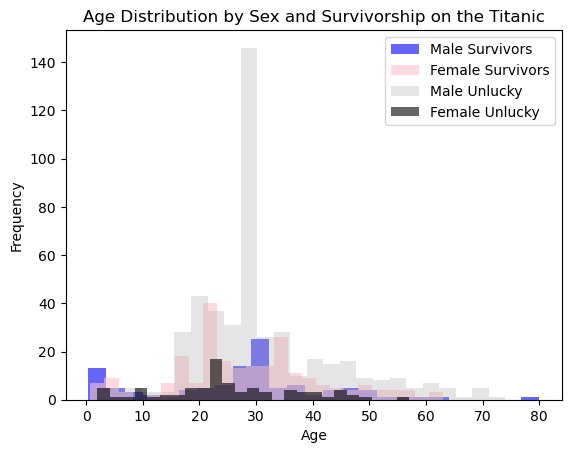

In [23]:
'''Your code here'''
male_survivors = survivors_df[survivors_df['Sex'] == 1] #finding survivors for male passengers 
female_survivors = survivors_df[survivors_df['Sex'] == 0] #finding survivors for female passengers 
male_unlucky = non_survivors_df[non_survivors_df['Sex'] == 1] #finding unlucky male passengers 
female_unlucky = non_survivors_df[non_survivors_df['Sex'] == 0] #finding unlucky female passengers 

plt.hist(male_survivors['Age'], bins=25, color='blue', alpha=0.6, label='Male Survivors') #plotting survivors for male passengers 
plt.hist(female_survivors['Age'], bins=25, color='pink', alpha=0.6, label='Female Survivors') #plotting survivors for female passengers 
plt.hist(male_unlucky['Age'], bins=25, color='darkgrey', alpha=0.3, label='Male Unlucky') #plotting unlucky male passengers 
plt.hist(female_unlucky['Age'], bins=25, color='black', alpha=0.6, label='Female Unlucky') #plotting unlucky female passengers 
plt.xlabel('Age') #labeling the x-axis
plt.ylabel('Frequency') #labeling the y-axis
plt.title('Age Distribution by Sex and Survivorship on the Titanic') #labeling the title 
plt.legend() #adding in the legend 
plt.show() #showing the plot 

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [66]:
'''Your code here'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['Sex', 'Age','Pclass', 'Fare', 'Family_Size'] #columns used to predict survival
label = ['Survived']  #column we are predicting (target)

X_train, X_test, y_train, y_test = train_test_split(Titanic_df[features], Titanic_df[label], test_size = 0.2) #spliting the data into training (80%) and testing sets (20%)

ss = StandardScaler() #starting the standardScaler
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_text = y_test.values.ravel()

In [68]:
Xs_train.shape

(712, 5)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1) #startuing the KNN classifier with 15 neighbors 
knn_clf.fit(Xs_train, y_train) #fitting the KNN model on the training data

y_knn_train = knn_clf.predict(Xs_train) #predicting the labels for the training set using the fitted model
y_knn_test = knn_clf.predict(Xs_test) #predicting the labels for the test set using the fitted model


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth=4) #startuing the decision tree classifier with 3 questions
tree_clf.fit(Xs_train, y_train) #fitting the decision tree on the training data

y_tree_train = tree_clf.predict(Xs_train) #predicting the labels for the training set using the fitted model
y_tree_test = tree_clf.predict(Xs_test) #predicting the labels for the test set using the fitted model


Text(0.5, 1.0, 'confusion matrix for testing data')

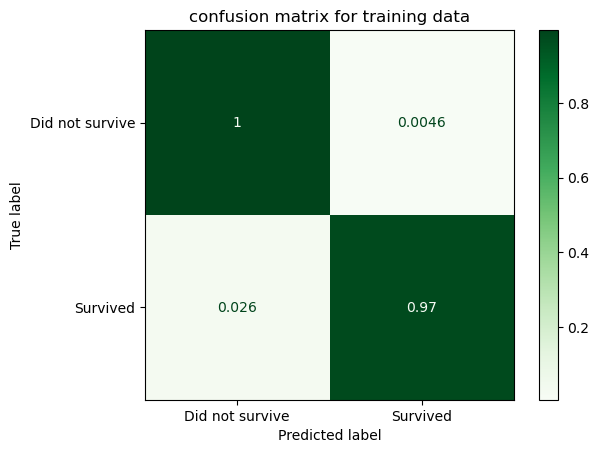

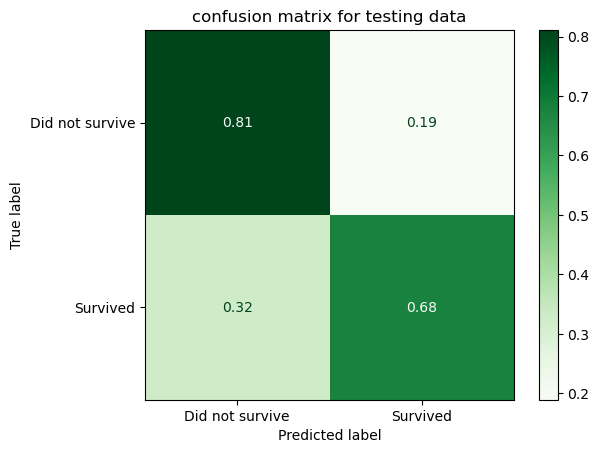

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay


#confusion Matrix for KNN (training)
cm_knn_train = ConfusionMatrixDisplay.from_predictions(ys_train, y_knn_train, 
                                                       display_labels=['Did not survive', 'Survived'],
                                                       normalize='true', cmap='Greens')
plt.title('confusion matrix for training data')

#confusion matrix for KNN (test)
cm_knn_test = ConfusionMatrixDisplay.from_predictions(y_test, y_knn_test, 
                                                      display_labels=['Did not survive', 'Survived'],
                                                      normalize='true', cmap='Greens')
plt.title('confusion matrix for testing data')


Text(0.5, 1.0, 'confusion matrix for testing data')

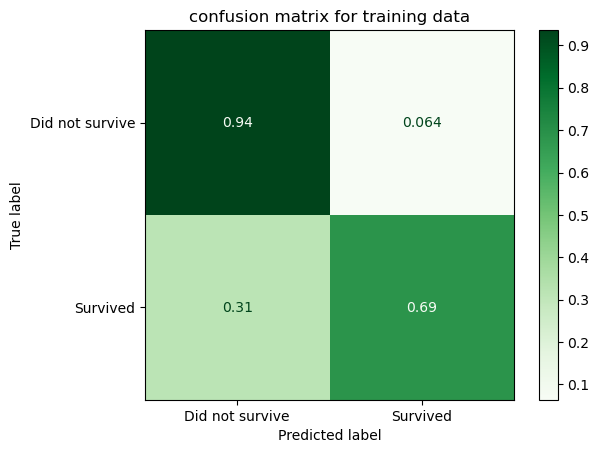

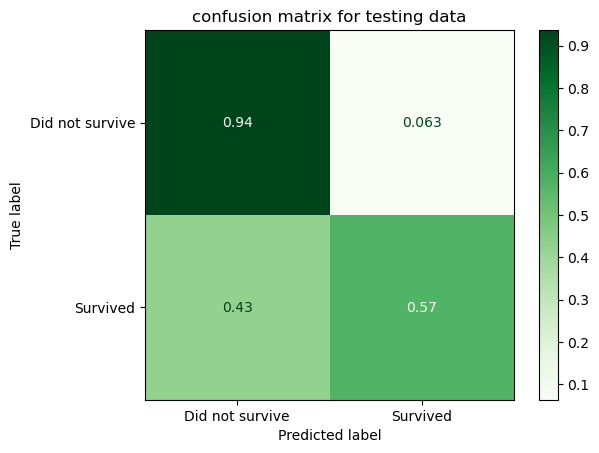

In [76]:
#confusion matrix for decision tree (training)
cm_tree_train = ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train, 
                                                        display_labels=['Did not survive', 'Survived'],
                                                        normalize='true', cmap='Greens')
plt.title('confusion matrix for training data')

#confusion matrix for decision tree (test)
cm_tree_test = ConfusionMatrixDisplay.from_predictions(y_test, y_tree_test, 
                                                       display_labels=['Did not survive', 'Survived'],
                                                       normalize='true', cmap='Greens')
plt.title('confusion matrix for testing data')


#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - It seems like overall both models seem to do better on the training data for the "Did not survive" category, however, for the "survived" category, both models do better on the testing data, with this being the case across models. Big picture, though, it seems like the training data and test data seem to have similar performance, keeping in mind the trade-offs between those two categories.

Which models did you fit and which worked better?
 
 - I fit the KNN model and then the decision tree. The decision tree seems to be better at identifying survivors well both the KNN and decision tree are good at finding those that did not survive in both the testing and training data, seems like decision tree is best for the current data.